In [2]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
from tensorflow .keras import datasets

In [4]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
np.ndim(X_train)

4

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train = y_train.flatten()

In [12]:
y_train.shape

(50000,)

In [13]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

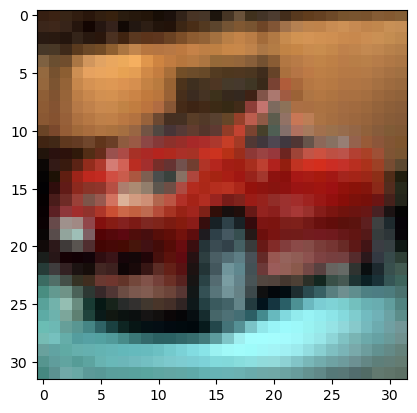

In [14]:
plt.imshow(X_train[45])
plt.show()

In [15]:
y_train[45]

1

In [16]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
categories[1]

'automobile'

In [18]:
def plot_image(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(categories[y[index]])
    plt.show()

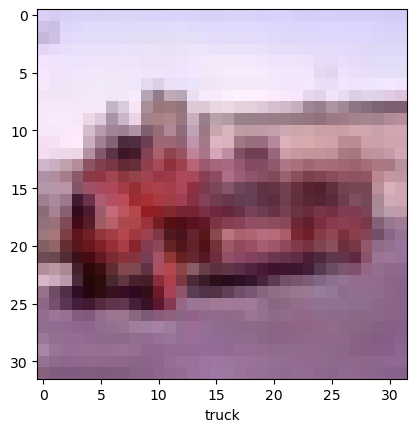

In [20]:
plot_image(X_train, y_train, 67)

In [21]:
y_test.shape

(10000, 1)

In [22]:
y_test = y_test.flatten()

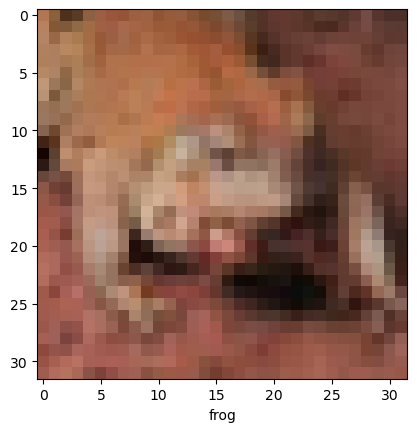

In [23]:
plot_image(X_test, y_test, 5)

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
X_train = X_train/255
X_test = X_test/255

In [27]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation= 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [28]:
ann.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['Accuracy'])

In [29]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10


1563/1563 [==============================] - 140s 89ms/step - loss: 1.8901 - Accuracy: 0.3270
Epoch 2/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.6700 - Accuracy: 0.3988
Epoch 3/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5922 - Accuracy: 0.4294
Epoch 4/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5474 - Accuracy: 0.4440
Epoch 5/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5066 - Accuracy: 0.4608
Epoch 6/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.4751 - Accuracy: 0.4724
Epoch 7/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4576 - Accuracy: 0.4786
Epoch 8/10
1563/1563 [==============================] - 138s 89ms/step - loss: 1.4319 - Accuracy: 0.4873
Epoch 9/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.4145 - Accuracy: 0.4905
Epoch 10/10
1563/1563 [==============================

In [34]:
cnn = keras.Sequential([
    keras.layers.Conv2D(input_shape=(32, 32, 3), filters = 32, kernel_size=3, activation='relu', padding = 'same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation= 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [36]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 33s 20ms/step - loss: 1.4580 - Accuracy: 0.4788
Epoch 2/2
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1069 - Accuracy: 0.6111
